In [1]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance
Warning message:
"package 'imbalance' was built under R version 3.5.2"Loading required package: ROSE
Warning message:
"package 'ROSE' was built under R version 3.5.2"Loaded ROSE 0.0-3



In [3]:
TRAIN <- read.csv(file="C:/Users/Chen/Project/data/TRAINo.csv")
dim(TRAIN)
head(TRAIN)

[1] 3693   76

X,Date,Longitude,Latitude,Season_code_1,Season_code_2,Season_code_3,CULEX_ERRATICUS,CULEX_PIPIENS,CULEX_PIPIENS_RESTUANS,...,TrapClusterNum_2,TrapClusterNum_10,TrapClusterNum_4,TrapClusterNum_3,Month_6,Month_8,Month_9,Month_10,Month_7,Month_5
1545,2009-06-02,-87.54659,41.74064,0,1,0,0,0,3,...,0,0,0,0,1,0,0,0,0,0
3014,2011-08-12,-87.67146,41.94723,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3566,2013-06-14,-87.54659,41.74064,0,1,0,0,0,2,...,0,0,0,0,1,0,0,0,0,0
2198,2009-08-27,-87.71628,41.84607,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3351,2011-09-16,-87.55931,41.67862,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1612,2009-06-12,-87.70305,41.77166,0,1,0,0,0,2,...,0,0,0,0,1,0,0,0,0,0


In [5]:
colnames(TRAIN)

[1] "X"                      "Date"                   "Longitude"             
 [4] "Latitude"               "Season_code_1"          "Season_code_2"         
 [7] "Season_code_3"          "CULEX_ERRATICUS"        "CULEX_PIPIENS"         
[10] "CULEX_PIPIENS_RESTUANS" "CULEX_RESTUANS"         "CULEX_SALINARIUS"      
[13] "CULEX_TARSALIS"         "CULEX_TERRITANS"        "ParasiticIn"           
[16] "Influenza"              "WnvPresentB"            "Tmax2"                 
[19] "Tmin2"                  "Tavg2"                  "WetBulb2"              
[22] "Heat2"                  "PrecipTotal2"           "StnPressure2"          
[25] "ResultDir2"             "AvgSpeed2"              "DZ2"                   
[28] "FG2"                    "HZ2"                    "RA2"                   
[31] "RA45_2"                 "BR2"                    "TS2"                   
[34] "TSRA2"                  "VCTS2"                  "Tmax"                  
[37] "Tmin"                   "Tavg"                   "Depart"                
[40] "DewPoint"               "Heat"                   "Cool"                  
[43] "Sunrise"                "Sunset"                 "PrecipTotal"           
[46] "ResultSpeed"            "ResultDir"              "AvgSpeed"              
[49] "BR"                     "DZ"                     "FG"                    
[52] "HZ"                     "RA"                     "RA45"                  
[55] "TS"                     "TSRA"                   "VCTS"                  
[58] "pre45_1_2"              "pre45_1"                "pre45_05"              
[61] "TrapClusterNum_7"       "TrapClusterNum_9"       "TrapClusterNum_1"      
[64] "TrapClusterNum_5"       "TrapClusterNum_8"       "TrapClusterNum_6"      
[67] "TrapClusterNum_2"       "TrapClusterNum_10"      "TrapClusterNum_4"      
[70] "TrapClusterNum_3"       "Month_6"                "Month_8"               
[73] "Month_9"                "Month_10"               "Month_7"               
[76] "Month_5"

In [15]:
TRAIN$Date <- as.Date(TRAIN$Date, format = "%Y-%m-%d")

TRAIN$Month_5<-as.factor(TRAIN$Month_5)
TRAIN$Month_6<-as.factor(TRAIN$Month_6)
TRAIN$Month_7<-as.factor(TRAIN$Month_7)
TRAIN$Month_8<-as.factor(TRAIN$Month_8)
TRAIN$Month_9<-as.factor(TRAIN$Month_9)
TRAIN$Month_10<-as.factor(TRAIN$Month_10)

TRAIN$Season_code_1<- as.factor(TRAIN$Season_code_1)
TRAIN$Season_code_2<- as.factor(TRAIN$Season_code_2)
TRAIN$Season_code_3<- as.factor(TRAIN$Season_code_3)

TRAIN$DZ2<- as.factor(TRAIN$DZ2)
TRAIN$FG2<- as.factor(TRAIN$FG2)

TRAIN$HZ2<- as.factor(TRAIN$HZ2)

TRAIN$BR2 <- as.factor(TRAIN$BR2)
TRAIN$RA2 <- as.factor(TRAIN$RA2)
TRAIN$RA <- as.factor(TRAIN$RA)
TRAIN$TS2 <- as.factor(TRAIN$TS2)
TRAIN$TSRA2 <- as.factor(TRAIN$TSRA2)
TRAIN$VCTS2 <- as.factor(TRAIN$VCTS2)
TRAIN$BR <- as.factor(TRAIN$BR)
TRAIN$DZ <- as.factor(TRAIN$DZ)
TRAIN$FG <- as.factor(TRAIN$FG)



TRAIN$HZ <- as.factor(TRAIN$HZ)
TRAIN$TS <- as.factor(TRAIN$TS)
TRAIN$TSRA <- as.factor(TRAIN$TSRA)
TRAIN$VCTS <- as.factor(TRAIN$VCTS)

TRAIN$pre45_1_2 <- as.factor(TRAIN$pre45_1_2)
TRAIN$pre45_1 <- as.factor(TRAIN$pre45_1)
TRAIN$pre45_05 <- as.factor(TRAIN$pre45_05)

TRAIN$TrapClusterNum_7 <- as.factor(TRAIN$TrapClusterNum_7)      
TRAIN$TrapClusterNum_9 <- as.factor(TRAIN$TrapClusterNum_9)     
TRAIN$TrapClusterNum_1 <- as.factor(TRAIN$TrapClusterNum_1)    
TRAIN$TrapClusterNum_5 <- as.factor(TRAIN$TrapClusterNum_5)      
TRAIN$TrapClusterNum_8 <- as.factor(TRAIN$TrapClusterNum_8)      
TRAIN$TrapClusterNum_6 <- as.factor(TRAIN$TrapClusterNum_6)      
TRAIN$TrapClusterNum_2 <- as.factor(TRAIN$TrapClusterNum_2)      
TRAIN$TrapClusterNum_4 <- as.factor(TRAIN$TrapClusterNum_4)      
TRAIN$TrapClusterNum_3 <- as.factor(TRAIN$TrapClusterNum_3)
TRAIN$TrapClusterNum_10 <- as.factor(TRAIN$TrapClusterNum_10)

TRAIN$WnvPresentB <- as.factor(TRAIN$WnvPresentB) #y=WnvPresentB

In [16]:
str(TRAIN)

'data.frame':	3693 obs. of  76 variables:
 $ X                     : int  1545 3014 3566 2198 3351 1612 4206 3035 2256 1450 ...
 $ Date                  : Date, format: "2009-06-02" "2011-08-12" ...
 $ Longitude             : num  -87.5 -87.7 -87.5 -87.7 -87.6 ...
 $ Latitude              : num  41.7 41.9 41.7 41.8 41.7 ...
 $ Season_code_1         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Season_code_2         : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 2 1 1 ...
 $ Season_code_3         : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 2 2 ...
 $ CULEX_ERRATICUS       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_PIPIENS         : int  0 0 0 0 0 0 10 0 0 23 ...
 $ CULEX_PIPIENS_RESTUANS: int  3 1 2 1 1 2 8 2 21 9 ...
 $ CULEX_RESTUANS        : int  5 0 14 0 6 2 3 0 1 0 ...
 $ CULEX_SALINARIUS      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_TARSALIS        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_TERRITANS       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ParasiticIn           : num  0.28 0.25

In [17]:

vn <- setdiff(names(TRAIN),c('X','Date'))

In [18]:
table(TRAIN$WnvPresentB)
table(TRAIN$WnvPresentB)/nrow(TRAIN)*100


   0    1 
3381  312 


        0         1 
91.551584  8.448416 

In [19]:
num1 <- length(which(TRAIN$WnvPresentB == 1))#חישוב חיובי
num0 <- length(which(TRAIN$WnvPresentB == 0))
nInstances <- num0 - num1 #לדעת מה ההפרש, כדי לדעת איך לחשב
cbind(num1=num1,num0=num0,nInstances=nInstances)

num1,num0,nInstances
312,3381,3069


In [20]:
library(partykit)

Warning message:
"package 'partykit' was built under R version 3.5.2"Loading required package: grid
Loading required package: libcoin
Warning message:
"package 'libcoin' was built under R version 3.5.2"Loading required package: mvtnorm


In [21]:
TEST <- read.csv(file="C:/Users/Chen/Project/data/TESTo.csv")
head(TEST)

X,Date,Longitude,Latitude,Season_code_1,Season_code_2,Season_code_3,CULEX_ERRATICUS,CULEX_PIPIENS,CULEX_PIPIENS_RESTUANS,...,TrapClusterNum_7,TrapClusterNum_4,TrapClusterNum_9,TrapClusterNum_10,Month_9,Month_6,Month_8,Month_7,Month_5,Month_10
1214,2007-09-19,-87.72655,41.82561,0,0,1,0,0,4,...,0,0,0,0,1,0,0,0,0,0
2381,2009-09-25,-87.75241,41.77830,0,0,1,0,0,4,...,0,0,0,0,1,0,0,0,0,0
1745,2009-06-26,-87.59986,41.67341,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
20,2007-06-05,-87.81283,41.98196,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2275,2009-09-14,-87.69499,41.85740,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
468,2007-08-01,-87.66634,41.82254,0,1,0,0,12,65,...,0,0,0,0,0,0,1,0,0,0


In [37]:
TEST$Date<-NULL
#TEST$Date <- as.Date(TEST$Date, format = "%Y-%m-%d")


TEST$Season_code_1<- as.factor(TEST$Season_code_1)
TEST$Season_code_2<- as.factor(TEST$Season_code_2)
TEST$Season_code_3<- as.factor(TEST$Season_code_3)

TEST$DZ2<- as.factor(TEST$DZ2)
TEST$FG2<- as.factor(TEST$FG2)

TEST$HZ2<- as.factor(TEST$HZ2)

TEST$BR2 <- as.factor(TEST$BR2)
TEST$RA2 <- as.factor(TEST$RA2)
TEST$RA <- as.factor(TEST$RA)
TEST$TS2 <- as.factor(TEST$TS2)
TEST$TSRA2 <- as.factor(TEST$TSRA2)
TEST$VCTS2 <- as.factor(TEST$VCTS2)
TEST$BR <- as.factor(TEST$BR)
TEST$DZ <- as.factor(TEST$DZ)
TEST$FG <- as.factor(TEST$FG)



TEST$HZ <- as.factor(TEST$HZ)
TEST$TS <- as.factor(TEST$TS)
TEST$TSRA <- as.factor(TEST$TSRA)
TEST$VCTS <- as.factor(TEST$VCTS)

TEST$pre45_1_2 <- as.factor(TEST$pre45_1_2)
TEST$pre45_1 <- as.factor(TEST$pre45_1)
TEST$pre45_05 <- as.factor(TEST$pre45_05)

TEST$TrapClusterNum_7 <- as.factor(TEST$TrapClusterNum_7)      
TEST$TrapClusterNum_9 <- as.factor(TEST$TrapClusterNum_9)     
TEST$TrapClusterNum_1 <- as.factor(TEST$TrapClusterNum_1)    
TEST$TrapClusterNum_5 <- as.factor(TEST$TrapClusterNum_5)      
TEST$TrapClusterNum_8 <- as.factor(TEST$TrapClusterNum_8)      
TEST$TrapClusterNum_6 <- as.factor(TEST$TrapClusterNum_6)      
TEST$TrapClusterNum_2 <- as.factor(TEST$TrapClusterNum_2)      
TEST$TrapClusterNum_4 <- as.factor(TEST$TrapClusterNum_4)      
TEST$TrapClusterNum_3 <- as.factor(TEST$TrapClusterNum_3)
TEST$TrapClusterNum_10 <- as.factor(TEST$TrapClusterNum_10)

TEST$Month_5<-as.factor(TEST$Month_5)
TEST$Month_6<-as.factor(TEST$Month_6)
TEST$Month_7<-as.factor(TEST$Month_7)
TEST$Month_8<-as.factor(TEST$Month_8)
TEST$Month_9<-as.factor(TEST$Month_9)
TEST$Month_10<-as.factor(TEST$Month_10)

TEST$WnvPresentB <- as.factor(TEST$WnvPresentB) #y=WnvPresentB



In [34]:
TEST$X<-NULL

In [38]:
str(TEST)

'data.frame':	461 obs. of  74 variables:
 $ Longitude             : num  -87.7 -87.8 -87.6 -87.8 -87.7 ...
 $ Latitude              : num  41.8 41.8 41.7 42 41.9 ...
 $ Season_code_1         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Season_code_2         : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 2 2 2 ...
 $ Season_code_3         : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 1 1 1 1 ...
 $ CULEX_ERRATICUS       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_PIPIENS         : int  0 0 1 0 0 12 0 7 0 0 ...
 $ CULEX_PIPIENS_RESTUANS: int  4 4 1 0 1 65 8 58 3 2 ...
 $ CULEX_RESTUANS        : int  0 0 4 2 0 5 2 0 1 1 ...
 $ CULEX_SALINARIUS      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_TARSALIS        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_TERRITANS       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ParasiticIn           : num  0.29 0.26 0.28 0.26 0.26 0.29 0.24 0.25 0.29 0.26 ...
 $ Influenza             : num  0.67 0.6 0.85 0.8 0.6 0.67 0.72 0.57 0.67 0.58 ...
 $ WnvPresentB           : Factor

In [24]:
TRAIN <- TRAIN[,vn]

In [25]:
summary(TRAIN[,vn])

   Longitude         Latitude     Season_code_1 Season_code_2 Season_code_3
 Min.   :-87.93   Min.   :41.64   0:3644        0:1074        0:2668       
 1st Qu.:-87.75   1st Qu.:41.75   1:  49        1:2619        1:1025       
 Median :-87.69   Median :41.86                                            
 Mean   :-87.69   Mean   :41.85                                            
 3rd Qu.:-87.64   3rd Qu.:41.94                                            
 Max.   :-87.53   Max.   :42.02                                            
 CULEX_ERRATICUS    CULEX_PIPIENS      CULEX_PIPIENS_RESTUANS CULEX_RESTUANS   
 Min.   :0.000000   Min.   :   0.000   Min.   :  0.00         Min.   :  0.000  
 1st Qu.:0.000000   1st Qu.:   0.000   1st Qu.:  1.00         1st Qu.:  0.000  
 Median :0.000000   Median :   0.000   Median :  3.00         Median :  1.000  
 Mean   :0.001895   Mean   :   9.365   Mean   : 14.39         Mean   :  5.026  
 3rd Qu.:0.000000   3rd Qu.:   3.000   3rd Qu.: 11.00         3rd Qu

In [26]:
colnames(TRAIN)
dim(TRAIN)

[1] "Longitude"              "Latitude"               "Season_code_1"         
 [4] "Season_code_2"          "Season_code_3"          "CULEX_ERRATICUS"       
 [7] "CULEX_PIPIENS"          "CULEX_PIPIENS_RESTUANS" "CULEX_RESTUANS"        
[10] "CULEX_SALINARIUS"       "CULEX_TARSALIS"         "CULEX_TERRITANS"       
[13] "ParasiticIn"            "Influenza"              "WnvPresentB"           
[16] "Tmax2"                  "Tmin2"                  "Tavg2"                 
[19] "WetBulb2"               "Heat2"                  "PrecipTotal2"          
[22] "StnPressure2"           "ResultDir2"             "AvgSpeed2"             
[25] "DZ2"                    "FG2"                    "HZ2"                   
[28] "RA2"                    "RA45_2"                 "BR2"                   
[31] "TS2"                    "TSRA2"                  "VCTS2"                 
[34] "Tmax"                   "Tmin"                   "Tavg"                  
[37] "Depart"                 "DewPoint"               "Heat"                  
[40] "Cool"                   "Sunrise"                "Sunset"                
[43] "PrecipTotal"            "ResultSpeed"            "ResultDir"             
[46] "AvgSpeed"               "BR"                     "DZ"                    
[49] "FG"                     "HZ"                     "RA"                    
[52] "RA45"                   "TS"                     "TSRA"                  
[55] "VCTS"                   "pre45_1_2"              "pre45_1"               
[58] "pre45_05"               "TrapClusterNum_7"       "TrapClusterNum_9"      
[61] "TrapClusterNum_1"       "TrapClusterNum_5"       "TrapClusterNum_8"      
[64] "TrapClusterNum_6"       "TrapClusterNum_2"       "TrapClusterNum_10"     
[67] "TrapClusterNum_4"       "TrapClusterNum_3"       "Month_6"               
[70] "Month_8"                "Month_9"                "Month_10"              
[73] "Month_7"                "Month_5"

[1] 3693   74

In [30]:
colnames(TEST)
dim(TEST)

[1] "Longitude"              "Latitude"               "Season_code_1"         
 [4] "Season_code_2"          "Season_code_3"          "CULEX_ERRATICUS"       
 [7] "CULEX_PIPIENS"          "CULEX_PIPIENS_RESTUANS" "CULEX_RESTUANS"        
[10] "CULEX_SALINARIUS"       "CULEX_TARSALIS"         "CULEX_TERRITANS"       
[13] "ParasiticIn"            "Influenza"              "WnvPresentB"           
[16] "Tmax2"                  "Tmin2"                  "Tavg2"                 
[19] "WetBulb2"               "Heat2"                  "PrecipTotal2"          
[22] "StnPressure2"           "ResultDir2"             "AvgSpeed2"             
[25] "DZ2"                    "FG2"                    "HZ2"                   
[28] "RA2"                    "RA45_2"                 "BR2"                   
[31] "TS2"                    "TSRA2"                  "VCTS2"                 
[34] "Tmax"                   "Tmin"                   "Tavg"                  
[37] "Depart"                 "DewPoint"               "Heat"                  
[40] "Cool"                   "Sunrise"                "Sunset"                
[43] "PrecipTotal"            "ResultSpeed"            "ResultDir"             
[46] "AvgSpeed"               "BR"                     "DZ"                    
[49] "FG"                     "HZ"                     "RA"                    
[52] "RA45"                   "TS"                     "TSRA"                  
[55] "VCTS"                   "pre45_1_2"              "pre45_1"               
[58] "pre45_05"               "TrapClusterNum_8"       "TrapClusterNum_5"      
[61] "TrapClusterNum_2"       "TrapClusterNum_1"       "TrapClusterNum_6"      
[64] "TrapClusterNum_3"       "TrapClusterNum_7"       "TrapClusterNum_4"      
[67] "TrapClusterNum_9"       "TrapClusterNum_10"      "Month_9"               
[70] "Month_6"                "Month_8"                "Month_7"               
[73] "Month_5"                "Month_10"

[1] 461  74

In [31]:

mod1 <- glm(WnvPresentB ~., data=TRAIN, family="binomial")
#auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1,newdata=TEST,type="response"))
#res <- cbind('baseline',auc1)
#res

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [39]:
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1,newdata=TEST,type="response"))
res <- cbind('baseline',auc1)
res

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

,auc1
baseline,0.905566733735748


## Dataset Inbalance treatment
 
### Undersampling

In [40]:
#under sampling
#ovun.sample - עושה את כל העבודה בשבילנו
#Class ~ = Y
#numPositive*2= רוצים פי 2 מה1, כדי שסהכ שנקבל זה 35 של 1 ו35 של 0
#סהכ הדאתא הוא פי 2
data_balanced_under <- ovun.sample(WnvPresentB ~ ., data = TRAIN, method = "under",N = num1*2)$data
table(data_balanced_under$WnvPresentB)


  0   1 
312 312 

In [41]:
head(data_balanced_under)

Longitude,Latitude,Season_code_1,Season_code_2,Season_code_3,CULEX_ERRATICUS,CULEX_PIPIENS,CULEX_PIPIENS_RESTUANS,CULEX_RESTUANS,CULEX_SALINARIUS,...,TrapClusterNum_2,TrapClusterNum_10,TrapClusterNum_4,TrapClusterNum_3,Month_6,Month_8,Month_9,Month_10,Month_7,Month_5
-87.74230,41.76373,0,1,0,0,0,2,2,0,...,0,0,0,0,1,0,0,0,0,0
-87.66783,41.82590,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
-87.76089,41.90765,0,1,0,0,0,7,2,0,...,0,0,0,0,0,1,0,0,0,0
-87.67146,41.94723,0,1,0,0,1,26,3,0,...,0,0,0,0,0,1,0,0,0,0
-87.75241,41.77830,0,1,0,0,0,3,4,0,...,0,0,0,0,1,0,0,0,0,0
-87.67146,41.94723,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
mod1 <- glm(WnvPresentB ~., data=data_balanced_under,family="binomial")
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST,type="response"))
res <- rbind(res, cbind('Under sampling',auc1))
res

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

,auc1
baseline,0.905566733735748
Under sampling,0.912206572769953


### over sampling

In [43]:
#over sampling
data_balanced_over <- ovun.sample(WnvPresentB ~ ., data = TRAIN, method = "over",N = num0*2)$data
table(data_balanced_over$WnvPresentB)


   0    1 
3381 3381 

In [44]:
mod1 <- glm(WnvPresentB ~., data=data_balanced_over,family="binomial")
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST,type="response"))
res <- rbind(res, cbind('Over sampling',auc1))
res

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

,auc1
baseline,0.905566733735748
Under sampling,0.912206572769953
Over sampling,0.9158953722334


In [45]:
dim(TEST)

[1] 461  74

In [46]:
dim(data_balanced_over)
head(data_balanced_over)

[1] 6762   74

Longitude,Latitude,Season_code_1,Season_code_2,Season_code_3,CULEX_ERRATICUS,CULEX_PIPIENS,CULEX_PIPIENS_RESTUANS,CULEX_RESTUANS,CULEX_SALINARIUS,...,TrapClusterNum_2,TrapClusterNum_10,TrapClusterNum_4,TrapClusterNum_3,Month_6,Month_8,Month_9,Month_10,Month_7,Month_5
-87.54659,41.74064,0,1,0,0,0,3,5,0,...,0,0,0,0,1,0,0,0,0,0
-87.67146,41.94723,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
-87.54659,41.74064,0,1,0,0,0,2,14,0,...,0,0,0,0,1,0,0,0,0,0
-87.71628,41.84607,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
-87.55931,41.67862,0,0,1,0,0,1,6,0,...,0,0,0,0,0,0,1,0,0,0
-87.70305,41.77166,0,1,0,0,0,2,2,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
describe(data_balanced_over)

data_balanced_over 

 74  Variables      6762  Observations
--------------------------------------------------------------------------------
Longitude 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    6762        0      137        1    -87.7  0.09885   -87.86   -87.81 
     .25      .50      .75      .90      .95 
  -87.76   -87.70   -87.65   -87.59   -87.56 

lowest : -87.93099 -87.89061 -87.86299 -87.83276 -87.82481
highest: -87.53869 -87.53650 -87.53520 -87.53166 -87.53163
--------------------------------------------------------------------------------
Latitude 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    6762        0      137        1    41.85   0.1252    41.67    41.70 
     .25      .50      .75      .90      .95 
   41.75    41.87    41.95    41.99    42.00 

lowest : 41.64461 41.65911 41.66201 41.67341 41.67862
highest: 42.00831 42.00988 42.01041 42.01160 42.01743
-----------------------------------------------------

In [65]:
write.csv(data_balanced_over, file="C:/Users/Chen/Project/data/data_balanced_over.csv", row.names =F)

### over_under sampling

In [47]:
#over_under sampling
data_balanced_both <- ovun.sample(WnvPresentB ~ ., data = TRAIN, method = "both", p=0.5,N = 180, seed = 1)$data
table(data_balanced_both$WnvPresentB)
#לוקחים 50% מכל אחד.
#method = "both" כי זה שניהם
#seed = 1 - עושה רנדומלית כם ב0 וגם ב1
#מתקבל 90 כפול 2, זה  180



 0  1 
90 90 

In [60]:
mod1 <- glm(WnvPresentB ~., data=data_balanced_both, family="binomial")

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [48]:
#mod1 <- glm(WnvPresentB ~., data=data_balanced_both, family="binomial")
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST,type="response"))
res <- rbind(res, cbind('Over/Under sampling',auc1))
res

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [66]:
head(data_balanced_both)

ID,Block,Latitude,Longitude,Month,Season_code_1,Season_code_2,Season_code_3,CULEX_ERRATICUS,CULEX_PIPIENS,...,RA,RA45,TS,TSRA,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052,WnvPresentB
1396,38,41.94983,-87.69846,10,0,0,1,0,2,...,0,12,0,0,0,1,1,1,1,0
931,62,41.99499,-87.76928,8,0,1,0,0,3,...,1,19,0,1,0,1,1,1,1,0
3988,11,41.86711,-87.65422,8,0,1,0,0,1,...,0,11,0,0,0,0,1,1,1,0
2316,24,41.70457,-87.56567,9,0,0,1,0,2,...,0,11,0,0,0,1,0,1,1,0
3948,48,41.92520,-87.74638,7,0,1,0,0,0,...,0,9,0,0,0,0,1,1,1,0
920,52,41.79870,-87.73681,8,0,1,0,0,8,...,1,19,0,1,0,1,1,1,1,0


### ROSE

In [50]:
# Rose: 
data.rose <- ROSE(WnvPresentB ~ ., data = TRAIN, seed = 1)$data
table(data.rose$WnvPresentB)
#נותן את האוברסמפלינד. דאתא סינתטי
#OVER של ה1
#מוסיפים דאתא סינתטי של ה1 לפי הצורך
#ההפרש בין 0 ל1 הוא סינתטי שמבוסס על ההתפלגויות
#seed = 1 אפשר לשים כל מספר, המשמעות פשוט שזה מקבע את הרנדומליות


   0    1 
1894 1799 

In [51]:
head(data.rose)

Longitude,Latitude,Season_code_1,Season_code_2,Season_code_3,CULEX_ERRATICUS,CULEX_PIPIENS,CULEX_PIPIENS_RESTUANS,CULEX_RESTUANS,CULEX_SALINARIUS,...,TrapClusterNum_2,TrapClusterNum_10,TrapClusterNum_4,TrapClusterNum_3,Month_6,Month_8,Month_9,Month_10,Month_7,Month_5
-87.85076,41.93312,0,1,0,0,-36.182644406,-11.99619,-14.047363,0.4373109,...,0,0,0,0,1,0,0,0,0,0
-87.60132,41.77926,0,1,0,0,20.954348698,-51.48575,-9.440425,0.5581632,...,0,0,0,0,0,1,0,0,0,0
-87.61782,41.72627,0,1,0,0,-24.481448136,28.70850,-2.853907,0.3862704,...,0,0,0,0,0,0,0,0,1,0
-87.77899,41.73469,0,0,1,0,0.001158587,-39.54516,1.115627,0.3386929,...,0,0,0,0,0,0,1,0,0,0
-87.61849,41.84993,0,1,0,0,-35.550810550,-10.77276,-4.938746,-0.5268702,...,0,0,0,0,0,1,0,0,0,0
-87.50477,41.73758,0,0,1,0,-0.521438494,69.72293,-15.717208,0.3649434,...,0,0,0,0,0,0,0,1,0,0


In [52]:
mod1 <- glm(WnvPresentB ~., data=data.rose,family="binomial")
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST,type="response"))
res <- rbind(res, cbind('ROSE',auc1))
res

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

,auc1
baseline,0.905566733735748
Under sampling,0.912206572769953
Over sampling,0.9158953722334
ROSE,0.866465459423206


In [66]:
write.csv(res, file="C:/Users/Chen/Project/data/res.csv", row.names =F)

In [39]:
dim(data.rose)
head(data.rose)


[1] 3693   62

ID,Block,Latitude,Longitude,Month,Season_code_1,Season_code_2,Season_code_3,CULEX_ERRATICUS,CULEX_PIPIENS,...,RA,RA45,TS,TSRA,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052,WnvPresentB
-1869.728,11,41.93329,-87.75801,10,0,0,1,0,-12.447095,...,0,12.072877,0,0,0,1,1,1,1,0
2309.975,70,42.05072,-87.83230,9,0,0,1,0,-46.272931,...,0,7.715923,0,0,0,0,1,1,1,0
2293.883,17,41.92288,-87.66084,6,0,1,0,0,2.934105,...,0,14.573191,0,0,0,1,1,1,1,0
1259.830,37,41.76573,-87.92348,8,0,1,0,0,-29.616920,...,1,20.785348,0,1,0,1,1,1,1,0
2245.226,11,41.82572,-87.65259,6,0,1,0,0,-2.523225,...,0,16.364281,1,1,0,1,1,1,1,0
4619.058,89,41.69784,-87.52319,8,0,1,0,0,49.625316,...,0,10.430161,0,0,0,0,1,1,1,0


Oversampling with Synthetic data

In [53]:
nInstances
summary(TRAIN$WnvPresentB)
table(TRAIN$WnvPresentB)

[1] 3069

0    1 
3381  312


   0    1 
3381  312 

In [54]:
#לוקח אותו מספר של חיובי ושלילי. מוסיפים שלילי לפי הדאתא
newSamples <- pdfos(dataset = TRAIN, numInstances = nInstances,classAttr = "WnvPresentB")
#newDataset <- rbind(TRAIN, newSamples)
table(newDataset$WnvPresentB)


ERROR: Error in checkAllColumnsNumeric(dataset, exclude = classAttr): all columns of dataset must be numeric or numeric factors


In [43]:
newSamples <- pdfos(dataset = TRAIN, numInstances = nInstances,classAttr = "WnvPresent")
newDataset <- rbind(TRAIN, newSamples)
table(newDataset$WnvPresentB)

ERROR: Error in checkDatasetClass(dataset, classAttr): some of the class attribute(s) not found in dataset


In [44]:
mod1 <- glm(WnvPresentB ~., data=newDataset,family="binomial")
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST,type="response"))
res <- rbind(res, cbind('SMOTE',auc1))
res

ERROR: Error in is.data.frame(data): object 'newDataset' not found


In [55]:
res

,auc1
baseline,0.905566733735748
Under sampling,0.912206572769953
Over sampling,0.9158953722334
ROSE,0.866465459423206


### Fast-and-frugal decision trees (FFT)
 
As the conditional trees and other tree based algorithms take too much time to run, I decided to use a faster tree based algorithm called Fast-and-frugal decision trees.

In [56]:
if(!require(FFTrees)){install.packages("FFTrees");require(FFTrees)}
vn <- names(TRAIN)

Loading required package: FFTrees
Warning message:
"package 'FFTrees' was built under R version 3.5.2"
   O      
  / \     
 F   O  
    / \   
   F   Trees 1.4.0

Nathaniel.D.Phillips.is@gmail.com
FFTrees.guide() opens the guide.


In [57]:
library(Hmisc)
describe(TRAIN)

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



TRAIN 

 74  Variables      3693  Observations
--------------------------------------------------------------------------------
Longitude 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    3693        0      137        1   -87.69  0.09164   -87.81   -87.80 
     .25      .50      .75      .90      .95 
  -87.75   -87.69   -87.64   -87.59   -87.56 

lowest : -87.93099 -87.89061 -87.86299 -87.83276 -87.82481
highest: -87.53869 -87.53650 -87.53520 -87.53166 -87.53163
--------------------------------------------------------------------------------
Latitude 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    3693        0      137        1    41.85   0.1213    41.68    41.70 
     .25      .50      .75      .90      .95 
   41.75    41.86    41.94    41.99    41.99 

lowest : 41.64461 41.65911 41.66201 41.67341 41.67862
highest: 42.00831 42.00988 42.01041 42.01160 42.01743
------------------------------------------------------------------

In [58]:
mod1 <- fft(WnvPresentB ~. , TRAIN)
mod1 <- FFTrees(formula = WnvPresentB ~., data = TRAIN,data.test = TEST)
mod1

ERROR: Error in fft(WnvPresentB ~ ., TRAIN): non-numeric argument


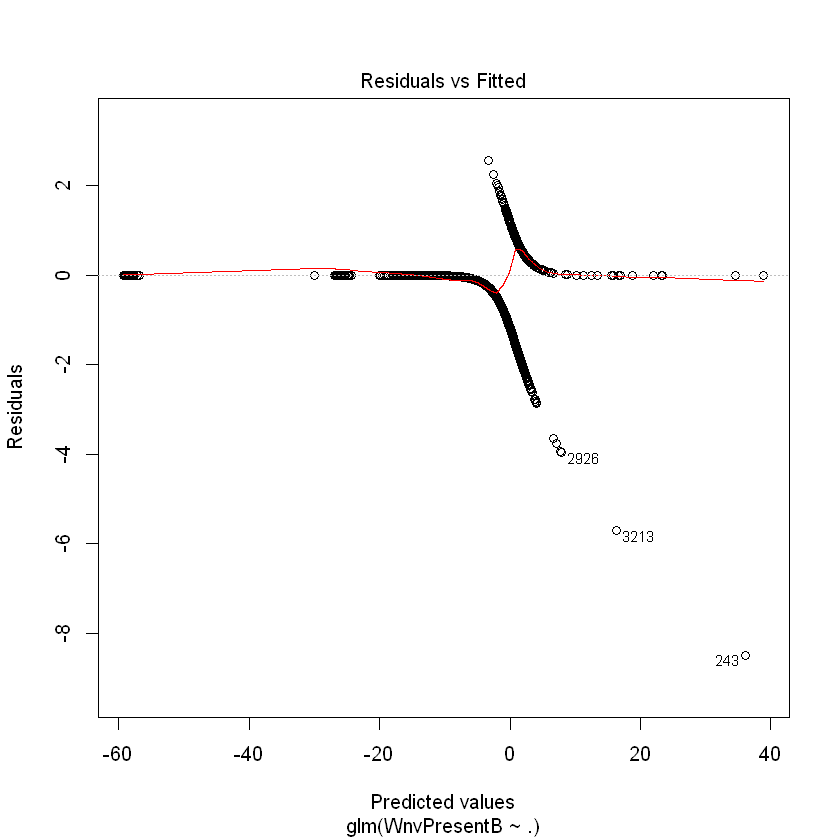

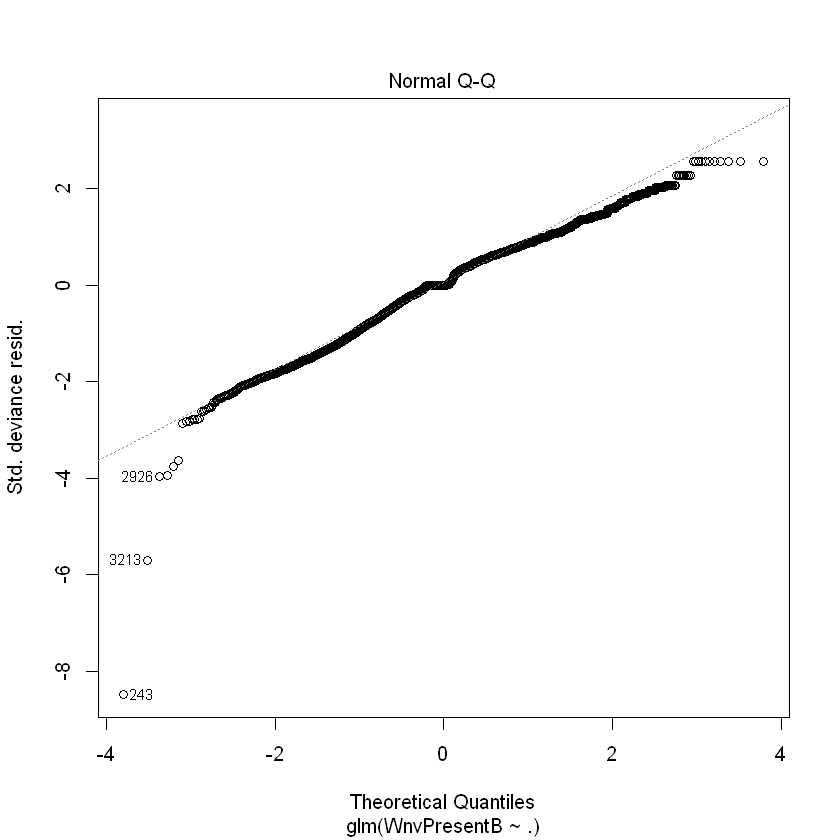

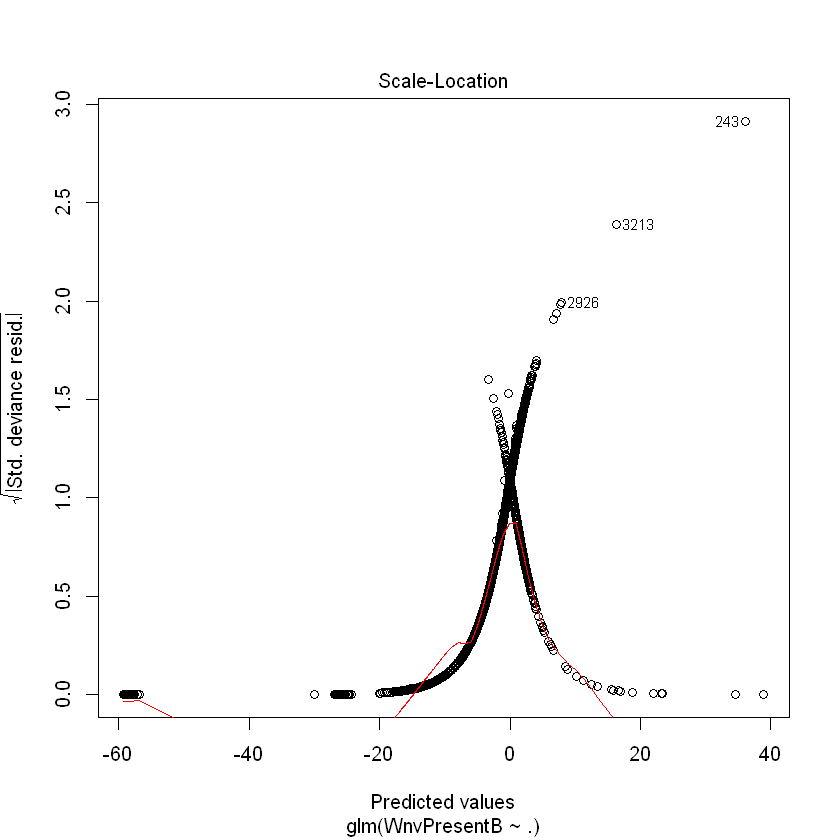

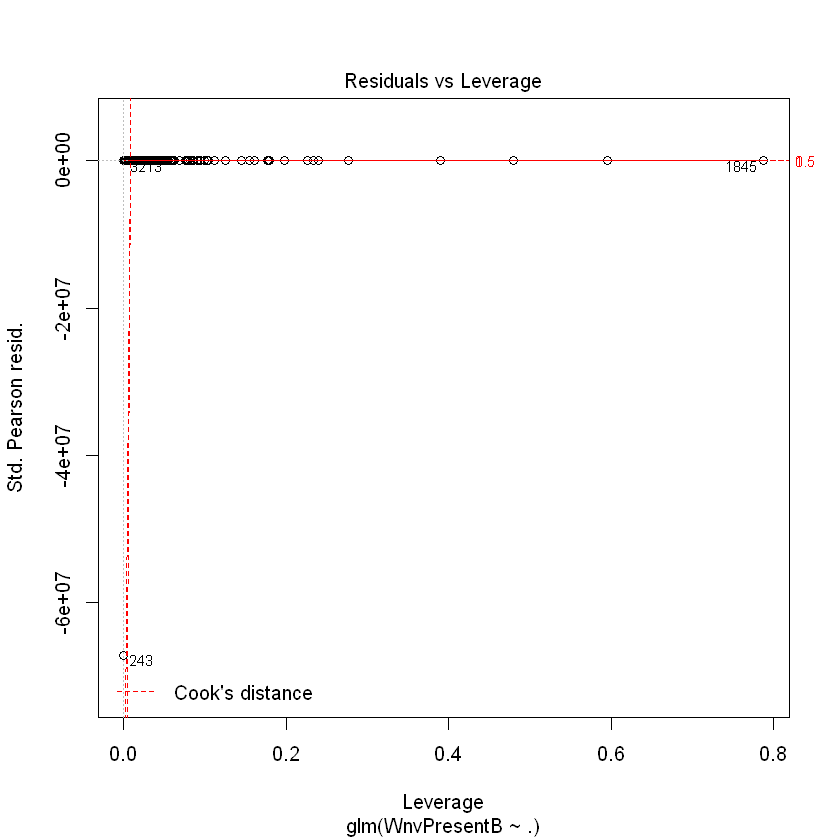

In [61]:
plot(mod1)

In [63]:
#pred <- predict(mod1, newdata=TEST[,vn])
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST, type="prob")[,2])
res <- cbind('baseline',auc1)
res


ERROR: Error in match.arg(type): 'arg' should be one of "link", "response", "terms"


### Imbalance Treatment

In [197]:
## Under
mod1 <- FFTrees(formula = WnvPresentB ~., data = data_balanced_under)
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST[,vn], type="prob")[,2])
res <- rbind(res,cbind('under',auc1))
res


WnvPresentB is now logical.


,auc1
baseline,0.853759558198811
under,0.853759558198811


In [198]:
## Over
mod1 <- FFTrees(formula = WnvPresentB ~., data = data_balanced_over)
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST[,vn], type="prob")[,2])
res <- rbind(res,cbind('over',auc1))
res


WnvPresentB is now logical.


,auc1
baseline,0.853759558198811
under,0.853759558198811
over,0.881018125177004


In [199]:
## Over/under
mod1 <- FFTrees(formula = WnvPresentB ~., data = data_balanced_both)
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST[,vn], type="prob")[,2])
res <- rbind(res,cbind('over/under',auc1))
res


WnvPresentB is now logical.


,auc1
baseline,0.853759558198811
under,0.853759558198811
over,0.881018125177004
over/under,0.850962900028321


In [200]:
## ROSE
mod1 <- FFTrees(formula = WnvPresentB ~., data = data.rose)
auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST[,vn], type="prob")[,2])
res <- rbind(res,cbind('ROSE',auc1))
res


WnvPresentB is now logical.


,auc1
baseline,0.853759558198811
under,0.853759558198811
over,0.881018125177004
over/under,0.850962900028321
ROSE,0.5


In [221]:
## SMOTE NOT WORKING ON YOUR DATA - don't know why.. leave it out
#mod1 <- FFTrees(formula = WnvPresentB ~., data = newDataset)
#auc1 <- pROC::auc(TEST$WnvPresentB, predict(mod1, newdata=TEST[,vn], type="prob")[,2])
#res <- rbind(res,cbind('SMOTE',auc1))
#res


### In your data, oversampling works better!